# Statistical Power

## Introduction


We've started to investigate hypothesis testing, p-values and their use for accepting or rejecting the null hypothesis. Building upon this, we can develop a concept of the power of a statistical test, as the test's ability to detect a difference, when one exists. In the case of our coin flipping example, the power of our statistical test would be the probability of rejecting the null hypothesis "this coin is fair" when the coin was unfair. As you might assume, the power of this statistical test would thus depend on several factors including our p-value threshold for rejecting the null hypothesis, the size of our sample and the 'level of unfairness' of the coin in question.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## The Power of a Statistical Test

The power of a statistical test is defined as the probability of rejecting the null hypothesis, given that it is indeed false. As with any probability, the power of a statistical test therefore ranges from 0 to 1, with 1 being a perfect test that gaurantees rejecting the null hypothesis when it is indeed false.

With that, let's recreate our previous coin flip simulation, and use it to plot some relationships between power, sample size, and our p-value cutoff.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

1
1
1
1
0
0
1
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
2
2
1
2
2
1
2
2
1
1
2
0
1
2
2
2
1
1
2
1
1
2
2
1
2
2
1
2
2
2
2
2
2
1
2
0
2
2
1
2
2
2
2
0
2
2
1
2
2
1
2
1
2
1
1
1
2
1
1
2
1
2
0
2
1
2
2
2
2
2
1
2
2
0
1
1
2
1
2
2
2
2
1
2
1
2
1
2
2
2
1
2
2
2
2
2
2
2
1
2
2
2
1
2
2
1
2
2
1
1
1
1
2
0
2
2
2
2
2
1
2
2
2
2
2
1
2
0
1
2
2
1
1
2
1
2
1
1
2
1
2
2
1
1
2
1
1
2
1
2
2
1
2
0
2
1
1
2
1
2
1
1
2
2
2
1
1
1
2
1
2
2
1
2
1
1
2
2
2
0
1
1
0
2
2
2
2
0
2
2
2
2
2
2
3
3
3
3
1
3
3
2
2
2
2
3
3
2
2
2
3
2
1
2
2
3
3
3
2
3
2
2
2
3
3
1
3
3
2
3
2
2
3
3
1
3
3
1
2
1
2
1
2
3
3
1
3
2
1
3
2
2
2
2
2
3
2
2
1
2
3
2
3
3
3
2
3
2
2
3
2
3
3
3
3
2
2
2
1
3
2
2
3
2
3
2
2
3
1
3
2
2
2


12
16
15
13
14
17
16
13
13
15
15
16
12
18
14
16
11
15
17
12
13
14
13
12
14
19
13
11
16
12
16
14
12
12
14
13
14
14
11
11
11
14
14
12
15
13
12
15
16
16
14
15
15
11
16
17
15
13
14
14
13
13
16
16
17
13
14
12
14
16
15
19
18
12
16
12
17
15
15
11
13
17
14
12
14
11
15
17
14
15
12
16
12
16
15
14
15
11
12
18
16
12
12
14
12
16
15
12
14
14
15
13
16
13
16
17
14
15
10
15
12
11
15
14
12
12
13
14
12
14
14
16
13
11
17
15
15
13
12
14
14
12
10
13
12
16
15
12
13
12
11
16
15
14
14
15
12
13
11
13
13
15
14
12
13
16
14
18
16
16
14
17
16
14
12
13
14
16
15
16
14
15
16
15
14
15
13
16
14
15
14
17
14
15
17
15
14
15
14
11
13
12
15
13
15
17
13
15
14
15
14
16
13
16
14
15
16
15
18
14
16
17
13
14
16
17
15
16
14
19
14
15
11
15
15
16
11
15
16
16
17
15
17
14
14
14
17
17
15
13
15
14
19
13
17
16
14
16
15
17
14
15
16
15
12
17
17
13
16
13
15
16
14
12
15
12
17
14
15
13
13
19
18
16
16
16
14
16
16
11
13
16
13
11
13
15
16
18
18
17
14
14
14
12
14
16
17
20
14
16
17
16
14
16
16
14
15
13
16
14
13
16
17
15
18
16
17
15
13
14
19
13
16
1

25
26
26
22
28
23
24
23
25
28
27
27
26
26
31
27
23
28
24
29
20
30
28
22
22
23
22
24
23
27
24
25
27
28
28
29
28
26
23
24
24
27
24
28
27
24
27
26
26
27
28
29
22
27
24
26
26
22
22
27
23
23
26
22
26
22
24
28
23
26
24
22
24
24
27
26
24
28
29
27
28
31
24
23
27
19
26
26
28
23
21
29
22
26
23
25
28
27
26
26
17
27
29
31
27
23
27
25
28
24
21
28
27
29
27
26
26
24
24
30
29
25
22
23
29
28
23
27
27
24
23
22
25
27
28
23
19
24
26
27
29
22
28
22
25
25
26
26
29
22
26
22
24
23
28
29
23
27
25
25
28
26
25
29
25
23
22
23
23
26
23
24
25
22
25
29
27
26
23
23
25
25
27
25
29
22
26
22
27
25
20
25
22
25
22
28
25
26
26
26
26
27
25
27
27
25
26
25
26
32
24
23
27
24
28
26
25
28
27
28
28
25
30
26
27
26
23
25
23
24
22
26
28
25
26
28
25
26
26
26
28
30
26
31
24
26
27
30
27
29
26
24
24
24
26
25
26
21
25
23
24
30
27
25
22
25
26
26
26
25
25
27
26
26
30
32
28
20
27
26
22
25
27
29
23
23
25
29
25
26
26
23
30
26
28
28
23
32
26
28
25
26
26
28
24
24
32
27
25
26
25
28
29
24
25
27
26
25
25
26
26
27
27
26
23
24
22
27
26
24
29
28
19
2

[0.0,
 0.66,
 0.445,
 0.78,
 0.675,
 0.88,
 0.765,
 0.91,
 0.865,
 0.94,
 0.895,
 0.98,
 0.935,
 0.97,
 0.92,
 0.985,
 0.955,
 0.99,
 0.99,
 1.0,
 0.995,
 0.99,
 0.97,
 0.995,
 0.99,
 0.995,
 0.985,
 1.0,
 1.0,
 0.995,
 0.995,
 1.0,
 1.0,
 0.995,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.995,
 1.0,
 1.0,
 1.0,
 0.995,
 1.0,
 1.0]

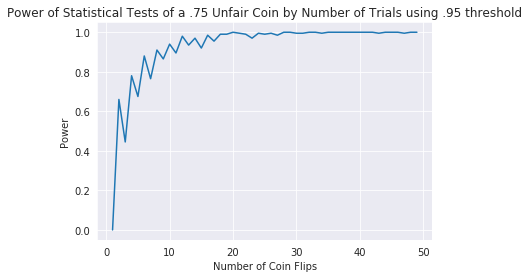

In [8]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        print(n_heads)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')
powers

As you can see, the statistical power of this test is wonderful once we take a sample of just 20 flips! You can also imagine how this power might change if we require a p-value of .99 to reject the null hypothesis:

Text(0.5,0,'Number of Coin Flips')

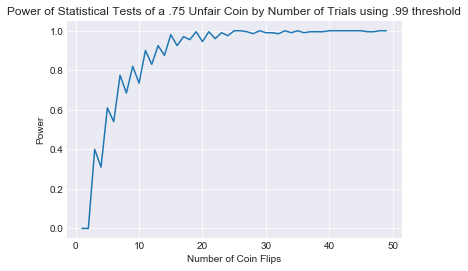

In [3]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .99 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .75
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob) # number of heads out of (n = # of flips)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5)) # binomial n * p * ( 1 - p)
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .75 Unfair Coin by Number of Trials using .99 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

or if we are trying to detect a only slightly unfair coin:

Text(0.5,0,'Number of Coin Flips')

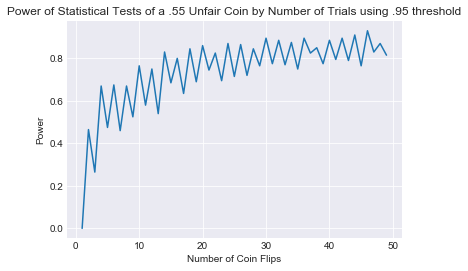

In [4]:
#What does the power increase as we increase sample size?
powers = []
cutoff = .95 #Set the p-value threshold for rejecting the null hypothesis
#Iterate through various sample sizes
unfair_coin_prob = .55
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        n_heads = np.random.binomial(n, unfair_coin_prob)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.cdf(np.abs(z)))
    cur_power = sum([1 if p >= cutoff else 0 for p in p_val])/200
    powers.append(cur_power)
plt.plot(list(range(1,50)), powers)
plt.title('Power of Statistical Tests of a .55 Unfair Coin by Number of Trials using .95 threshold')
plt.ylabel('Power')
plt.xlabel('Number of Coin Flips')

In [30]:
n = 100
binomial = np.random.binomial(n, unfair_coin_prob)
binomial

70

## Summary

In this lesson, we discussed the idea of "statistical power" and how sample size, p_value and effect size impact the power of an experiment. Remember, the power of a statistical test is the probability of rejecting the null hypothesis when it is indeed false.